---
MAT421 - Applied Computational Methods

Arizona State University

Homework #11

Written by Edward Hayes

---
This notebook is a review and an elaboration of the topics covered in Chapter 22 from *Python Programming and Numerical Methods - A Guide for Engineers and Scientists*.

---
# Chapter 22. Ordinary Differential Equation - Initial Value Problems
---

## 22.1 ODE Initial Value Problem Statement

A **differential equation** is an equation that represents the relationships between a function, $f(x)$, the independent variable, $x$, and it's derivatives. An **ordinary differential equation (ODE)** is a differential equation of one dimension. An $n^{th}$ order ODE can be written as,

$$F\bigg(x,f(x),\frac{df(x)}{dx},\frac{d^2f(x)}{dx^2},\frac{d^3f(x)}{dx^3},…,\frac{d^{n-1}f(x)}{dx^{n-1}}\bigg)=\frac{d^nf(x)}{dx^n}$$

<br>

An example of an ODE is a pendulum of length $l$ and mass $m$. As the pendulum swings, it's angle with respect to the verticle axis changes over time. This change is given by $Θ(t)$. By summing the forces on the pendulum and using algebraic manipulation the ODE is given as,

$$ml\frac{d^2\theta(t)}{dt^2}=-mgsin(\theta(t))$$

<br>

There are multiple solutions to an ODE.

*   General Solution

    A function, $g(x)$, that satisfies the entire differential equation.

*   Particular Solution

    A function, $p(x)$, that satisfies the differential equation and $n$ known values at certain points.

<br>

For the pendulum example above, lets assume the angles are very small and thus $sin(\theta(t))≈\theta(t)$. The ODE is reduced to,

$$l\frac{d^2\theta(t)}{dt^2}=-g\theta(t)$$

and the general solution is,

$$\theta_g(t)=cos\bigg(\sqrt{\frac{g}{l}}t\bigg)$$

If at $t=0$, angle $\theta_0$ and angular velocity of $0$ are known values then the particular solution is,

$$\theta_p(t)=\theta_0cos\bigg(\sqrt{\frac{g}{l}}t\bigg)$$

<br>

A set of known values for an ODE are initial values. Finding the the solution to an ODE given initial values is called an **initial value problem**.

For an $n^{th}$ order ODE, the initial values are the values of the terms at $x=0,f(0),f^1(0),f^2(0),…,f^{n-1}(0)$.

<br>

Most ODE solutions are difficult to solve and often require numerical methods.

##22.2 Reduction of Order

There are many numerical methods specifically designed for first order differential equations. As a result, higher order differential equations need to be reduce to a first order differential equation. 

<br>

A $n^{th}$ order differential equation can be reduced using a state of the system vector, $S(t)$, and it's derivative. 

$$S(t)=\begin{bmatrix}f(t)\\f^{(1)}(t)\\f^{(2)}(t)\\…\\f^{(n-1)}(t)\end{bmatrix}$$

<br>

$$\frac{dS(t)}{dt}=\begin{bmatrix}f^{(1)}(t)\\f^{(2)}(t)\\f^{(3)}(t)\\…\\f^{(n)}(t)\end{bmatrix}=\begin{bmatrix}S_2(t)\\S_3(t)\\S4(t)\\S_5(t)\\…\\F(t,S_1(t),…,S_{n-1}(t))\end{bmatrix}$$

<br>

This turns the $n^{th}$ order ODE into $n$ $1^{st}$ order ODEs that are coupled together. Reducing the order will result in an ODE with multiple variables.

##22.3 The Euler Method

Let $\frac{dS(t)}{dt}=F(t,S(t))$ be a $1^{st}$ order ODE and $t$ be numerical grid $[t_0,t_f]$ with spacing $h$. Assuming $t_0=0$ and $t_f=Nh$ where $N$ is a positive integer.

The linear approximation of $S(t)$ around $t_j$ at $t_{j+1}$ is

$$S(t_{j+1})=S(t_j)+(t_{j+1}-t_j)\frac{dS(t_j)}{dt}$$

or

$$(t_{j+1})=S(t_j)+hF(t_j,S(t_j))$$

This is the **Explicit Euler Formula**. The formula can be used to integrate the states from $t_0$ to $t_f$ using the following steps:

1.   Store $S_0=S(t_0)$ in an array, $S$
2.   Compute $S(t_1)=S_0+hF(t_0,S_0)$
3.   Store $S_1=S(t_1)$ in $S$
4.   Repeat Steps 1, 2, and 3 incrementing $t$ until $t_f$

Other methods are,

<br>

Implicit Euler Formula
$$S(t_{j+1})=S(t_j)+hF(t_{j+1},S(t_{j+1}))$$

<br>

Trapezoidal Formula
$$S(t_{j+1})=S(t_j)+\frac{h}{2}(F(t_{j},S(t_{j}))+F(t_{j+1},S(t_{j+1})))$$

<br>

For example, below is Python code that plots the solution for $\frac{df(t)}{dt}=e^{-t}$ with initial value $f_0=-1$ for multiple step sizes, $h$.

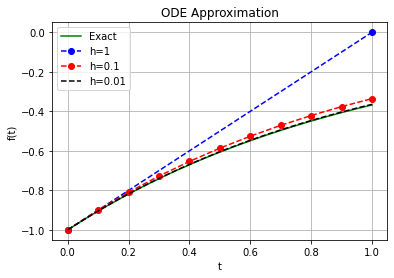

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(h,f,f0):

  # numerical grid
  t = np.arange(0,1+h,h)

  # s array
  s = np.zeros(len(t))
  s[0] = f0

  # steps
  for i in range(0,len(t)-1):
    s[i+1] = s[i]+h*f(t[i],s[i])

  return t, s
 
# ODE
f = lambda t,s: np.exp(-t)

# initial value
f0 = -1

# step size of 1
h1 = 1
t1, s1 = explicit_euler(h1,f,f0)

# step size of 0.1
h2 = 0.1
t2, s2 = explicit_euler(h2,f,f0)

# step size of 0.01
h3 = 0.01
t3, s3 = explicit_euler(h3,f,f0)

plt.plot(t3,-np.exp(-t3),'g',label='Exact')
plt.plot(t1,s1,'bo--',label='h=1')
plt.plot(t2,s2,'ro--',label='h=0.1')
plt.plot(t3,s3,'k--',label='h=0.01')
plt.title('ODE Approximation')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid()
plt.show()

